In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-datasets/train.csv
/kaggle/input/titanic-datasets/test.csv


In [2]:
# Importing pandas and np
import numpy as np
import pandas as pd

# Importing Classifier Modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


training = pd.read_csv('../input/titanic-datasets/train.csv')
testing = pd.read_csv('../input/titanic-datasets/test.csv')

In [3]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
training.shape

(891, 12)

In [5]:
testing.shape

(418, 11)

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#Defining Bar chart for Visualizing attribute values
def bar_chart(attribute):
    survived = training[training['Survived']==1][attribute].value_counts()
    death = training[training['Survived']==0][attribute].value_counts()
    bc = pd.DataFrame([survived,death])
    bc.index = ['Survived','Death']
    bc.plot(kind='bar',stacked=True, figsize=(15,3))

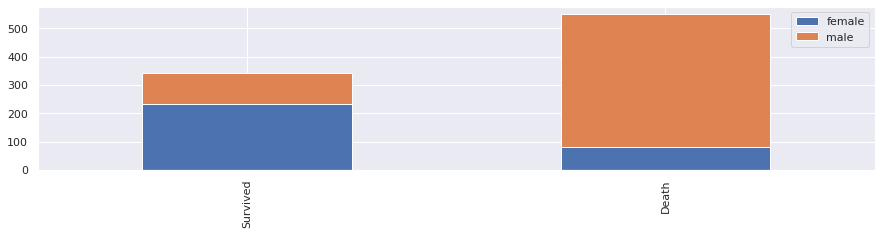

In [11]:
bar_chart('Sex')

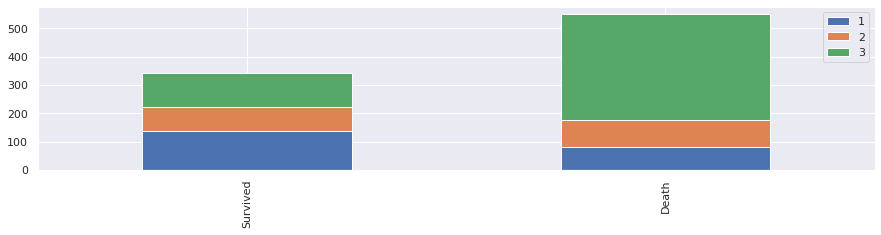

In [12]:
bar_chart('Pclass')

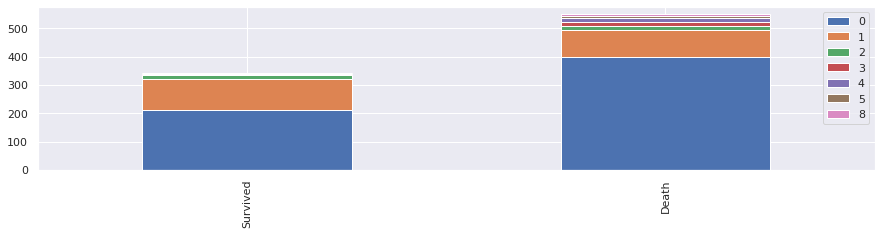

In [13]:
bar_chart('SibSp')

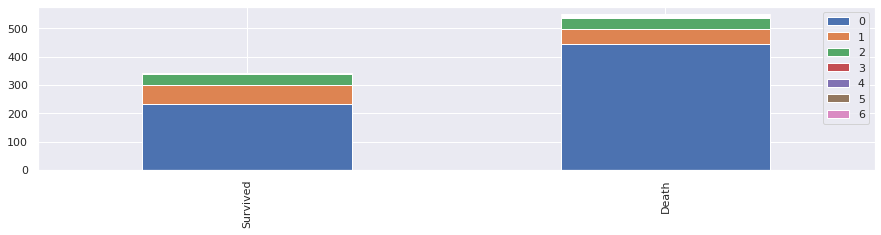

In [14]:
bar_chart('Parch')

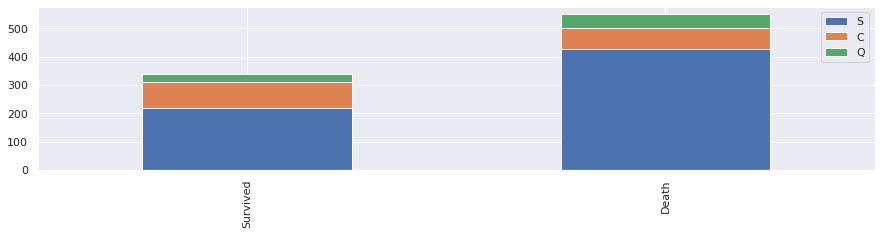

In [15]:
bar_chart('Embarked')

In [16]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# Combining training and testing dataset
training_testing_data = [training, testing] 

#Extracting Titles from Name attribute
for data in training_testing_data:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
training['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [19]:
testing['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [20]:
#mapping Title to numerical values
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 0, "Dr": 3, "Rev": 3, "Col": 3, "Major": 0, "Mlle": 3,"Countess": 3,
                 "Ms": 1, "Lady": 1, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 2,"Capt": 3,"Sir": 0 }
for data in training_testing_data:
    data['Title'] = data['Title'].map(title_mapping)

In [21]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


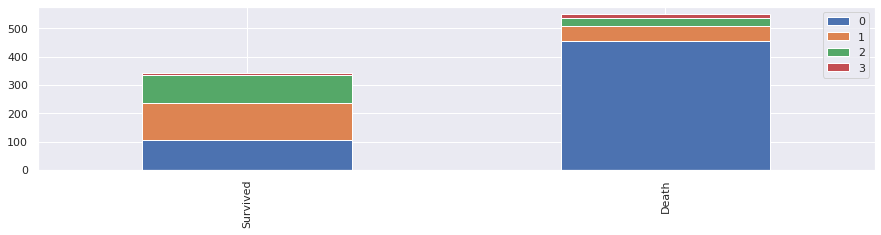

In [23]:
bar_chart('Title')

In [24]:
#Dropping Name field
training.drop('Name', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)

In [25]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [27]:
#mapping Gender to numerical values
sex_mapping = {"male": 0, "female": 1}
for data in training_testing_data:
    data['Sex'] = data['Sex'].map(sex_mapping)

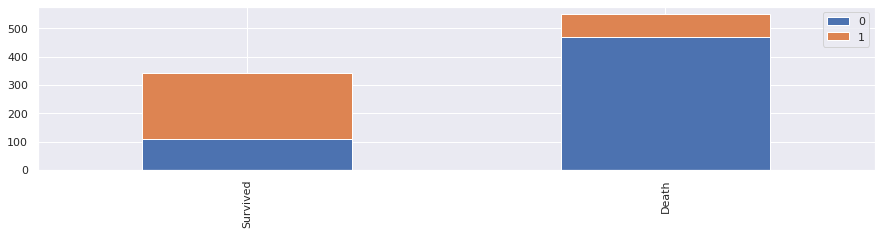

In [28]:
bar_chart('Sex')

In [29]:
training.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [30]:
#filling Age missing values with mean of title
training["Age"].fillna(training.groupby("Title")["Age"].transform("mean"), inplace=True)
testing["Age"].fillna(testing.groupby("Title")["Age"].transform("mean"), inplace=True)

In [31]:
training.head(30)
training.groupby("Title")["Age"].transform("mean")

0      30.190320
1      35.788991
2      21.993243
3      35.788991
4      30.190320
         ...    
886    42.800000
887    21.993243
888    21.993243
889    30.190320
890    30.190320
Name: Age, Length: 891, dtype: float64

In [32]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [33]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [34]:
#Categorising Age values and mapping it to numerical
for data in training_testing_data:    
    data.loc[ data['Age'] <= 25, 'Age'] = 0
    data.loc[(data['Age'] > 25) & (data['Age'] <= 35), 'Age'] = 1
    data.loc[(data['Age'] > 35) & (data['Age'] <= 45), 'Age'] = 2
    data.loc[(data['Age'] > 45) & (data['Age'] <= 60), 'Age'] = 3
    data.loc[ data['Age'] > 60, 'Age']=4
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,S,0


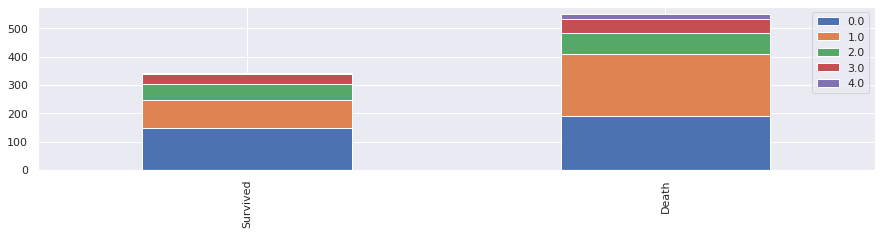

In [35]:
bar_chart('Age')

<AxesSubplot:>

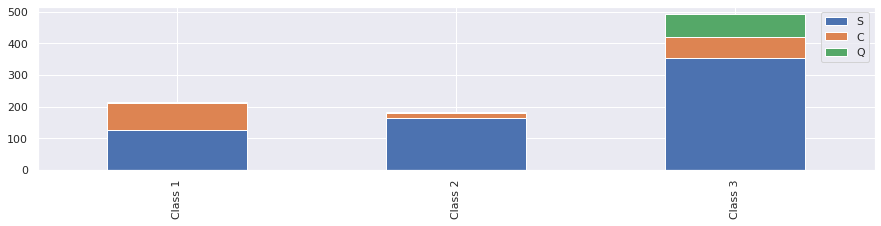

In [36]:
#Visualizing Embarked values
Pclass1 = training[training['Pclass']==1]['Embarked'].value_counts()
Pclass2 = training[training['Pclass']==2]['Embarked'].value_counts()
Pclass3 = training[training['Pclass']==3]['Embarked'].value_counts()
#using bar chart
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Class 1','Class 2', 'Class 3']
df.plot(kind='bar', stacked=True, figsize=(15,3))

In [37]:
#Filling missing values in Embarked attribute with 'S'
for data in training_testing_data:
    data['Embarked'] = data['Embarked'].fillna('S')

In [38]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,S,0


In [39]:
#Mapping Embarked attribute values to numerical values
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for data in training_testing_data:
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [40]:
#Filling missing values in Fare attribute with mean of Pclass
training["Fare"].fillna(training.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
testing["Fare"].fillna(testing.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
training.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,1.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,0
8,9,1,3,1,1.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [41]:
training.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,1.0,0,0,374910,8.0500,NaN,0,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1,0
97,98,1,1,0,0.0,0,1,PC 17759,63.3583,D10 D12,1,0
98,99,1,2,1,1.0,0,1,231919,23.0000,NaN,0,2


In [42]:
#CAtegorising Fare values and mapping it to numerical  
for data in training_testing_data:    
    data.loc[ data['Fare'] <= 25, 'Fare'] = 0
    data.loc[(data['Fare'] > 25) & (data['Fare'] <= 50), 'Fare'] = 1
    data.loc[(data['Fare'] > 50) & (data['Fare'] <= 100), 'Fare'] = 2
    data.loc[(data['Fare'] > 100), 'Fare'] = 3


In [43]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,0,0


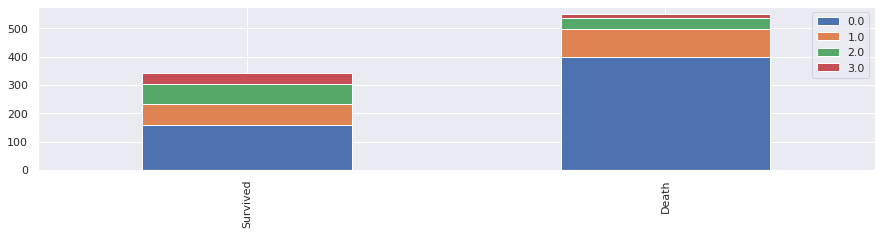

In [44]:
bar_chart('Fare')

In [45]:
training.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [46]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,0,0


In [47]:
#Creating new feature called 'FamilySize'
training["FamilySize"] = training["SibSp"] + training["Parch"] + 1
testing["FamilySize"] = testing["SibSp"] + testing["Parch"] + 1

In [48]:
#Mapping FamilySize to equal interval of numerical values to give equal weightage to each data
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for data in training_testing_data:
    data['FamilySize'] = data['FamilySize'].map(family_mapping)

In [49]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,0.0,1,0,A/5 21171,0.0,NaN,0,0,0.4
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,0.0
3,4,1,1,1,1.0,1,0,113803,2.0,C123,0,2,0.4
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,0,0,0.0


In [50]:
#dropping unwanted attributes
attributes_drop = ['Ticket', 'SibSp', 'Parch','Cabin']
training = training.drop(attributes_drop, axis=1)
testing = testing.drop(attributes_drop, axis=1)
training = training.drop(['PassengerId'], axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
#Splitting Training dataset into training and target data for model training
training_data = training.drop('Survived', axis=1)
target_data = training['Survived']

#Standardizing Training data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(training_data)
Y_train = target_data.to_numpy()
X_test = testing.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [52]:
#Standardizing Test data using StandardScaler
scaler_test = StandardScaler()
X_final_test = scaler_test.fit_transform(X_test)

In [53]:
training.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,0.0,0.0,0,0,0.4
1,1,1,1,2.0,2.0,1,2,0.4
2,1,3,1,1.0,0.0,0,1,0.0
3,1,1,1,1.0,2.0,0,2,0.4
4,0,3,0,1.0,0.0,0,0,0.0
5,0,3,0,1.0,0.0,2,0,0.0
6,0,1,0,3.0,2.0,0,0,0.0
7,0,3,0,0.0,0.0,0,0,1.6
8,1,3,1,1.0,0.0,0,2,0.8
9,1,2,1,0.0,1.0,1,2,0.4


**Parameter Tunining with GridSearchCV**

In [54]:
#RandomForestClassifier model
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

param_grid = [{'n_estimators':[10,100,200,500], 'max_depth':[None,5,10], 'min_samples_split':[2,3,4,5]}]

rf_grid_search = GridSearchCV(rf, param_grid, cv=3, scoring = 'accuracy', return_train_score=True)
rf_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [55]:
final_rf = rf_grid_search.best_estimator_
final_rf

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=10)

In [56]:
#accuracy of Random Forest classifier after parameter tuning
final_rf.score(X_train, Y_train)

0.8170594837261503

In [57]:
#Support Vector Classifier model
svc = SVC()

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svc_grid_search = GridSearchCV(svc, param_grid, cv=3, scoring = 'accuracy', return_train_score=True)
svc_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [58]:
final_svc = svc_grid_search.best_estimator_
final_svc

SVC(C=100, gamma=0.01)

In [59]:
##accuracy of SVC after parameter tuning
final_svc.score(X_train, Y_train)

0.8114478114478114

In [60]:
#DecisionTreeClassifier model
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt_grid_search = GridSearchCV(dt, param_grid, cv=3, scoring = 'accuracy', return_train_score=True)
dt_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [61]:
final_dt = dt_grid_search.best_estimator_
final_dt

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20)

In [62]:
###accuracy of decision tree after parameter tuning
final_dt.score(X_train, Y_train)

0.8103254769921436

In [63]:
#KNeighborsClassifier model
knn = KNeighborsClassifier()

param_grid = {
    'leaf_size': [5, 10, 20, 30, 40, 50],
    'n_neighbors': [5, 10, 15, 20, 25, 30],
    'p': [1, 2]
}
knn_grid_search = GridSearchCV(knn, param_grid, cv=3, scoring = 'accuracy', return_train_score=True)
knn_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 20, 30, 40, 50],
                         'n_neighbors': [5, 10, 15, 20, 25, 30], 'p': [1, 2]},
             return_train_score=True, scoring='accuracy')

In [64]:
final_knn = knn_grid_search.best_estimator_
final_knn

KNeighborsClassifier(leaf_size=20, n_neighbors=20, p=1)

In [65]:
#accuracy of knn after parameter tuning
final_knn.score(X_train, Y_train)

0.8125701459034792

**Ensembling selected models**

In [66]:
# Creating ensembles for 4 tuned models
Ensemble_HV = VotingClassifier(estimators =
                               [('rf', final_rf),
                                ('knn', final_knn),
                               ('svc', final_svc),
                                ('dt', final_dt)],
                               voting = 'hard')


In [67]:
Ensemble_HV.fit(X_train, Y_train)
Y_pred_HV = Ensemble_HV.predict(X_final_test)

In [68]:
Y_pred_HV

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
final_prediction = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": Y_pred_HV
    })
final_prediction.to_csv('final_prediction6.csv', index=False)